In [21]:
import pandas as pd

In [22]:
coperia_metadata = '/home/jmramirez/Documentos/COPERIA/coperia_api/dataset/coperia_metadata'
coperia_metadata = pd.read_csv(coperia_metadata, decimal=',', index_col=4)
coperia_metadata.head()

,patient_id,patient_type,age,gender,covid,long_covid,audio_type,audio_moment,audio_code,duration
audio_id,,,,,,,,,,
c6b9296a-eed4-4c54-9c80-ecf715a90b6b,1848560680d-b7b0077c-b059-4c72-a3d6-fc05f18739ff,covid-control,49,female,NaN,False,/cough/,before,84435-7,3.007
462f6e89-c12e-4e76-9916-17748f342472,1848560680d-b7b0077c-b059-4c72-a3d6-fc05f18739ff,covid-control,49,female,NaN,False,/cough/,before,84435-7,4.003
b4f0aa5a-2959-46c6-9fd5-5019b74b85d6,1848560680d-b7b0077c-b059-4c72-a3d6-fc05f18739ff,covid-control,49,female,NaN,False,/cough/,before,84435-7,3.006
89cdb797-f77c-464f-8b7b-304f0d509528,18486282fe2-1d4c0df2-25c3-458e-b44c-b05fc15f6ce7,covid-control,56,female,NaN,False,/cough/,after,84435-7,2.006
3b7b679d-1f2d-43bc-ba13-4f870cd7299e,18486282fe2-1d4c0df2-25c3-458e-b44c-b05fc15f6ce7,covid-control,56,female,NaN,False,/cough/,after,84435-7,3.003


In [40]:
# Get the labels and scores
labels_file = '/home/jmramirez/Documentos/COPERIA/notebooks/data/reference_all_a'
scores_file = '/home/jmramirez/Documentos/COPERIA/notebooks/data/coperia_all_a_scores.txt'

In [64]:
import warnings

def read_label_and_score_files(label_file: str, score_file: str) -> dict:
    """
    Read the label and score files, and return a dictionary with the id as key and the label and score as values
    :param label_file: file with the labels <id> <label>
    :param score_file:  file with the scrs <id> <score>
    :return: a dictionary with the id as key and the label and score as values {<id>: [<label>,<score>] }
    """
    # Read the ground truth labels into a dictionary
    sys_out = {}
    categories = ['n', 'p']
    labels = sorted(open(label_file).readlines())
    scrs = sorted(open(score_file).readlines())

    for label, scr in zip(labels, scrs):
        id_label, label = label.strip().split()
        id_score, scr = scr.strip().split()

        if id_label != id_score:
             warnings.warn("Expected the label file and score file to have the same ids", RuntimeWarning)
        else:
            sys_out[id_label] = [categories.index(label), float(scr)]

    del labels, scrs
    return sys_out

def filter_labels(sys_output: dict, labels: list) -> dict:
    """
    Filter the dictionary to include only the labels of interest
    :param sys_output: dictionary of labels and scores
    :param labels: list with the labels of interest
    :return: a dictionary of labels and scores
    """
    return {k: v for k, v in sys_output.items() if k in labels}


system_output = read_label_and_score_files(labels_file, scores_file)

<ipython-input-64-244294df9ecb>:21: RuntimeWarning: Expected the label file and score file to have the same ids
  warnings.warn("Expected the label file and score file to have the same ids", RuntimeWarning)


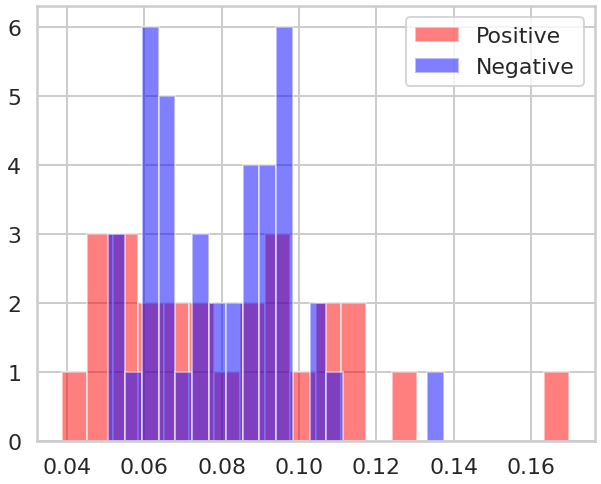

In [65]:
# Plot the scores for the positive and negative classes
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data to plot
y_score = [scr for _, scr in system_output.values()]
y_true = [label for label, _ in system_output.values()]

# Plot
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(10, 8))
plt.hist(np.array(y_score)[np.array(y_true) == 1], bins=20, alpha=0.5, label='Positive', color='red')
plt.hist(np.array(y_score)[np.array(y_true) == 0], bins=20, alpha=0.5, label='Negative', color='blue')
plt.legend()

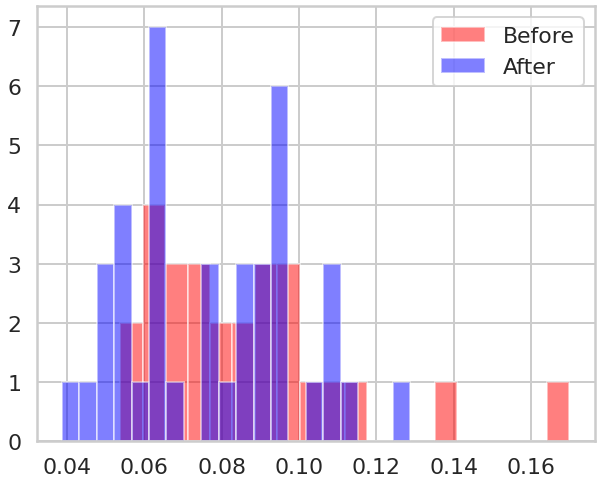

In [73]:
# Plot the scores for the after and before observations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get all the ids of the before and after observations
before_ids = coperia_metadata[coperia_metadata['audio_moment'] == 'before'].index
after_ids = coperia_metadata[coperia_metadata['audio_moment'] == 'after'].index

# Filter the system output to include only the before and after observations
before_sys_output = filter_labels(system_output, before_ids)
after_sys_output = filter_labels(system_output, after_ids)

# Plot
sns.set_style('whitegrid')
sns.set_context('poster')
plt.figure(figsize=(10, 8))
plt.hist(np.array([scr for _, scr in before_sys_output.values()]), bins=20, alpha=0.5, label='Before', color='red')
plt.hist(np.array([scr for _, scr in after_sys_output.values()]), bins=20, alpha=0.5, label='After', color='blue')
plt.legend()
plt.show()